In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ast import literal_eval

import sys
sys.path.insert(0, "../") 

from importlib import reload
from tblib import lattice
from tblib import hamiltonian
from tblib import sc_AHM
from tblib import plotting
from tblib import superfluid as sf

reload(lattice)
reload(hamiltonian)
reload(sf)
reload(sc_AHM)

<module 'tblib.sc_AHM' from 'c:\\Users\\atsch\\Desktop\\MasterVorlesungen\\Masterthesis\\Code\\tests\\..\\tblib\\sc_AHM.py'>

# Decomposition of the SFW

- get conventional part of superfluid weight $D_{s,xx}\approx D_s$
- $D_{conv, \mu, \nu}^s=\frac{1}{V}\sum_{\vec{k},m,n}C^{mm}_{nn}[j^{\uparrow}_{\mu}(\vec{k})]_{mm}[j^{\downarrow}_{\nu}(-\vec{k})]_{nn}$
    - $C^{mm}_{nn}=4\sum_{ab} \frac{n(E_a)-n(E_b)}{E_b-E_a}w_{+,am}^*w_{+,bm}w_{-,bn}^*w_{-,an}$
    - $[j^{\uparrow}_{\mu}(\vec{k})]_{mm}=\partial\epsilon_{\uparrow, m, \vec{k}}$
    - Eigenvector of $H_{BdG}$: $|\Psi_a\rangle = \sum_m w_{+,am}|+\rangle\otimes|m_{\uparrow, \vec{k}}\rangle +w_{-,am}|-\rangle\otimes|m^*_{\downarrow, -\vec{k}}\rangle)$ 
        - with $|\pm\rangle$ the eigenvectors of $\sigma_z$; $|m_{\uparrow, \vec{k}}\rangle$ the eigenvector of $H_{\vec{k}}^{\uparrow}$ (only hopping Hamiltonian!) and $\epsilon_{\uparrow, m, \vec{k}}$ the corresponding eigenvalue
    - $\implies D_{conv,\mu, \nu}^s=\sum \text{prefactor}\times(\text{Up current}\times\text{Down current})$
    - plot contribution of prefactor and current terms over k-space (0 to 2pi) for any energy pair

In [41]:
N=2
ham = hamiltonian.dDSLmodel(N=N, T=0, delta=np.ones(N), ns=np.ones(N), nu=N**2-N+1, U=np.ones(N), mu=-np.ones(N))
dels, nus, mus = sc_AHM.self_consistency_loop(ham, nk=41,HF=True, alpha=0.3, Nmin=10, Nmax=1200, g=1e-4)

In [42]:
convsfw, term = sf.SFWconv(ham, ny = (1,0), my = (1,0) , nk=21, dk=1e-6)

In [43]:
tens, dcsfw = sf.det_convSFW(ham, nk=21)

In [44]:
dcsfw

(0.020950739072468565-2.554282412225099e-50j)

In [45]:
convsfw

(0.020950739071933722-4.5770790255537725e-50j)

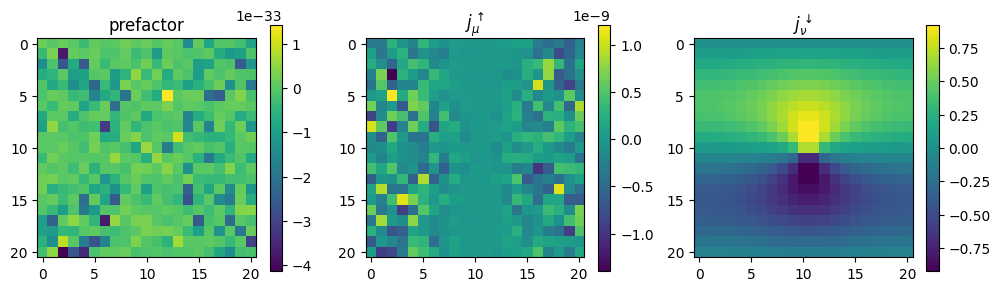

In [46]:
ep = 3 # energy pair 
s=21
pfgrid = term[:,0,ep].reshape(s,s)
upcurr = term[:,1,ep].reshape(s,s)
downcurr = term[:,2,ep].reshape(s,s)

fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(12,16))
axes[0].set_title('prefactor')
axes[1].set_title(r'$j^{\uparrow}_{\mu}$')
axes[2].set_title(r'$j^{\downarrow}_{\nu}$')
ax0 = axes[0].imshow(np.real(pfgrid))
ax1 = axes[1].imshow(np.real(upcurr))
ax2 = axes[2].imshow(np.real(downcurr))
fig.colorbar(ax0, shrink=0.2)
fig.colorbar(ax1, shrink=0.2)
fig.colorbar(ax2, shrink=0.2)
plt.show()

In [ ]:
#10 values: 9min 
Us = np.linspace(1e-4, 10, 10)
convsfwlist = []
c = 0
for U in Us:
    ham = hamiltonian.Model(N=2, kind='dDSL',T=0, delta=[0.2,0.2], ns=[0.5,0.5], nu=3, U=[U,U], mu=[-0.6,-0.6])
    dels, nus, mus = sc_AHM.self_consistency_loop(ham, nk=21,HF=True, alpha=0.7, Nmin=10, Nmax=1200)
    convsfw, term = sf.SFWconv(ham, nk=21, dk=1e-6)
    convsfwlist.append(convsfw)
    if c%5==0:
        print(U)
    c+=1

0.0001
5.5556


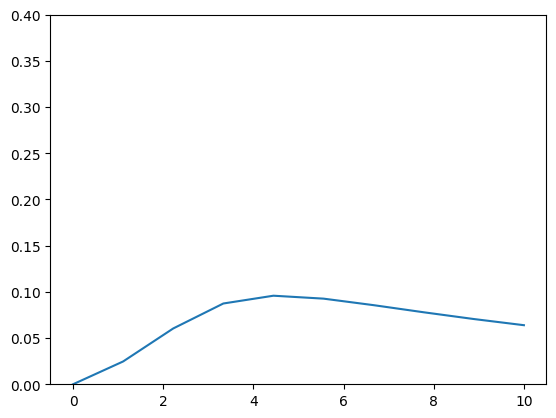

In [275]:
plt.ylim(0,0.4)
plt.plot(Us[:], np.abs(convsfwlist[:]))